## Extract Data (TFDS)

In [1]:
import tensorflow_datasets as tfds

In [3]:
(train, validation, test), info = tfds.load('fashion_mnist',split=['train[:80%]','train[80%:]','test'], as_supervised=True,with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\USER\tensorflow_datasets\fashion_mnist\3.0.1.incompleteFTM50E\fashion_mnist-train.tfrecord*…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\USER\tensorflow_datasets\fashion_mnist\3.0.1.incompleteFTM50E\fashion_mnist-test.tfrecord*.…

Dataset fashion_mnist downloaded and prepared to C:\Users\USER\tensorflow_datasets\fashion_mnist\3.0.1. Subsequent calls will reuse this data.


### Preview Data

In [4]:
print("URL Datasets : ", info.name)
print("Image Shape  : ", info.features['image'])
print("Image Label  : ", info.features['label'])

URL Datasets :  fashion_mnist
Image Shape  :  Image(shape=(28, 28, 1), dtype=tf.uint8)
Image Label  :  ClassLabel(shape=(), dtype=tf.int64, num_classes=10)


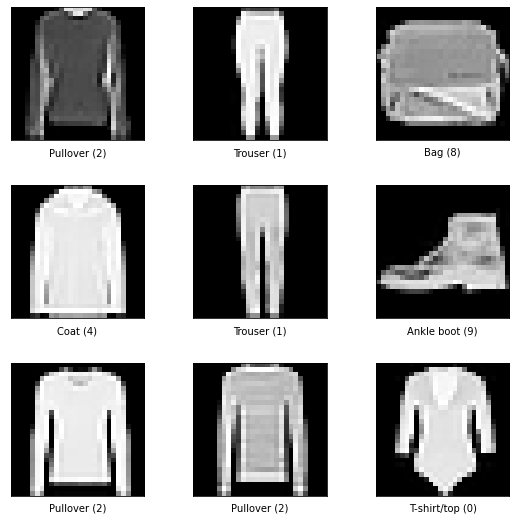

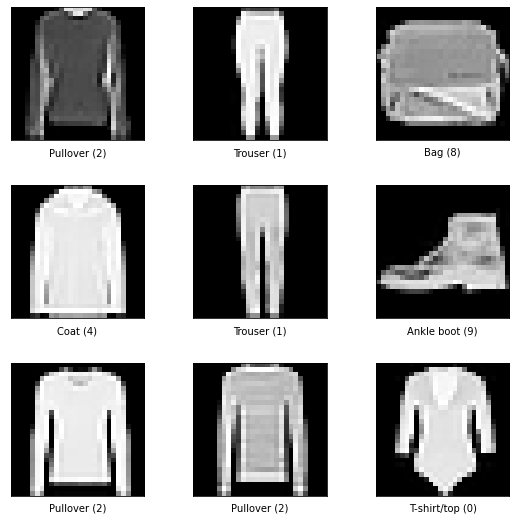

In [5]:
tfds.show_examples(train, info)

## Transformasi

In [6]:
import tensorflow as tf

In [7]:
def normalize_img(image, label):
  return tf.cast(image, tf.float32)/255 , label

train = train.map(normalize_img)
train = train.cache()
train = train.batch(128)

In [8]:
validation = validation.map(normalize_img)
validation = validation.cache()
validation = validation.batch(128)

test = test.map(normalize_img)
test = test.cache()
test = test.batch(128)

### Modelling

In [9]:
model = tf.keras.Sequential([

tf.keras.layers.Conv2D(128, (3,3), activation='relu',input_shape=[28, 28, 1]),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),

tf.keras.layers.Dense(256, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 256)               4

In [10]:
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [11]:
hasil = model.fit(train, epochs=3,batch_size=256,validation_data=test,verbose=1)

Epoch 1/3


c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


375/375 [==============================] - 86s 227ms/step - loss: 0.5365 - accuracy: 0.8074 - val_loss: 0.4120 - val_accuracy: 0.8544
Epoch 2/3
375/375 [==============================] - 80s 212ms/step - loss: 0.3449 - accuracy: 0.8760 - val_loss: 0.3399 - val_accuracy: 0.8775
Epoch 3/3
375/375 [==============================] - 102s 272ms/step - loss: 0.2967 - accuracy: 0.8913 - val_loss: 0.3151 - val_accuracy: 0.8846


In [12]:
 model.evaluate(validation,verbose=1)

94/94 [==============================] - 8s 82ms/step - loss: 0.2813 - accuracy: 0.8965


[0.28133082389831543, 0.8964999914169312]

### Prediksi Test

In [13]:
class_names = info.features['label'].names
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

1/1 [==============================] - 0s 28ms/step


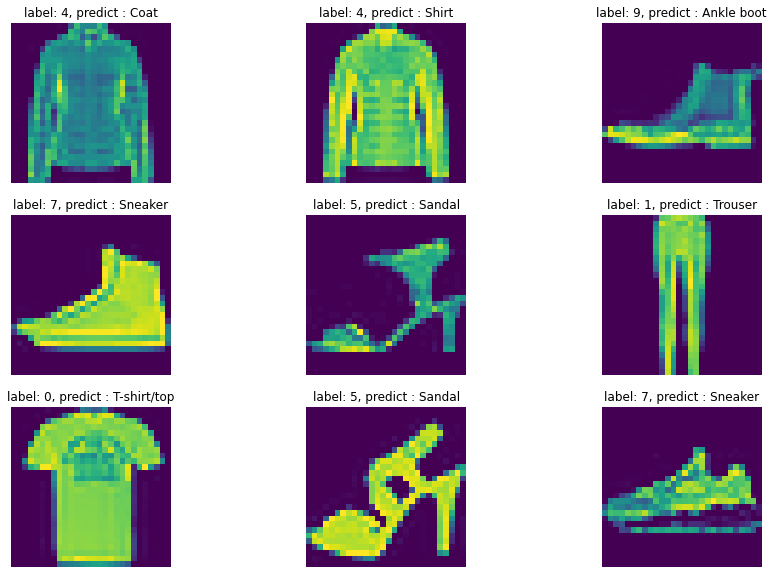

In [14]:
import matplotlib.pyplot as plt
import numpy as np

image ,label = next(iter(test))
plt.figure(figsize=(15,10))
for i in range(9) :
    plt.subplot(3,3,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...]))
    plt.imshow(tf.squeeze(image[i]))
    plt.title(f'label: {label[i]}, predict : {class_names[y_pred]}')